In [1]:
#importons notre ensemble de donées
import pandas as pd
data=pd.read_excel('bank.xlsx')
data.shape

(45211, 17)

In [2]:
#affichons quelque ligne de notre dataset
pd.set_option("display.max_columns",17)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
#regardons les informations corcernant chaque colonne
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


<AxesSubplot:>

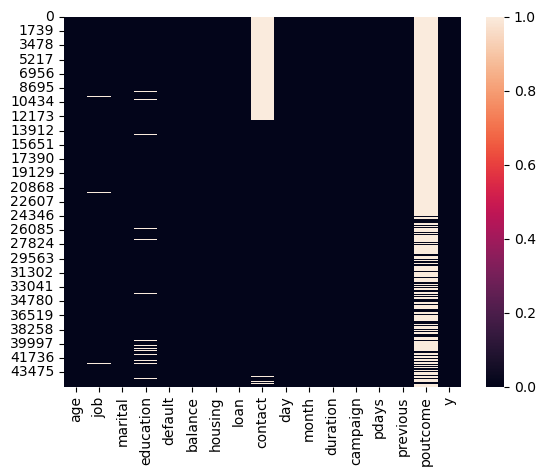

In [4]:
#Visualisons ou se situe les lignes manquantes de notre dataset
import seaborn as sns
sns.heatmap(data=="unknown")

In [5]:
#à partir de la figure ci-dessus on se rend compte que on ne doit pas supprimer les lignes ou se trouves des données manquantes
#car si on fait cela on va perdre énormement de données
#regardons le pourcentage de cellules vides dans chaque colonnes
a=data=='unknown'
a.sum()/45211


age          0.000000
job          0.006370
marital      0.000000
education    0.041074
default      0.000000
balance      0.000000
housing      0.000000
loan         0.000000
contact      0.287983
day          0.000000
month        0.000000
duration     0.000000
campaign     0.000000
pdays        0.000000
previous     0.000000
poutcome     0.817478
y            0.000000
dtype: float64

### on remarque  que notre dataset contient une colonne donc le pourcentage de valeurs manquantes est supérieur a 80% ce qui est enorme
cette colonne étant le resultat de la campagne publicitaire précédente sur les clients il etait question de savoir si la campagne avait porté ses fruits ou pas.
on ne peu donc pas facilement apporter une conclusion sur le fait que la campagne publicitaire aurait utile ou non car il y'a enormément de case vide.

### visualisons chaque variables pour en tiré des relations avec la variables cible y qui correspond aux décisions  des clients de notre ensemble de données commencons par les données numériques

<Figure size 640x480 with 0 Axes>

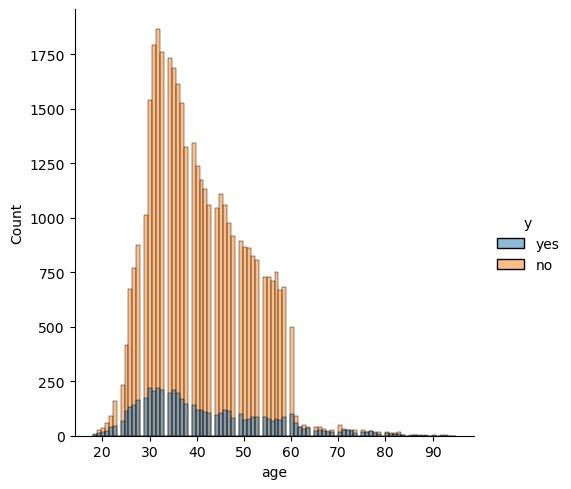

<Figure size 640x480 with 0 Axes>

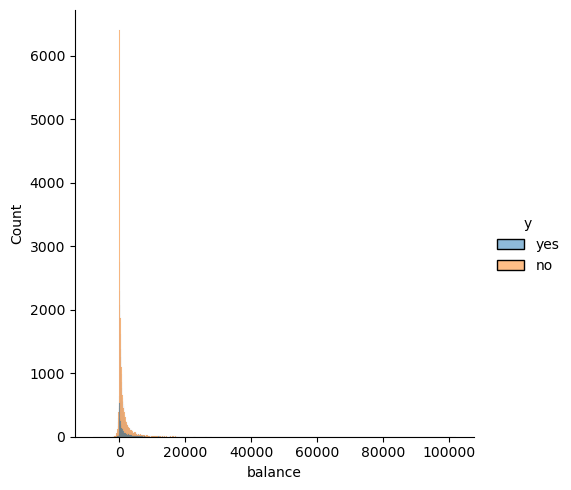

<Figure size 640x480 with 0 Axes>

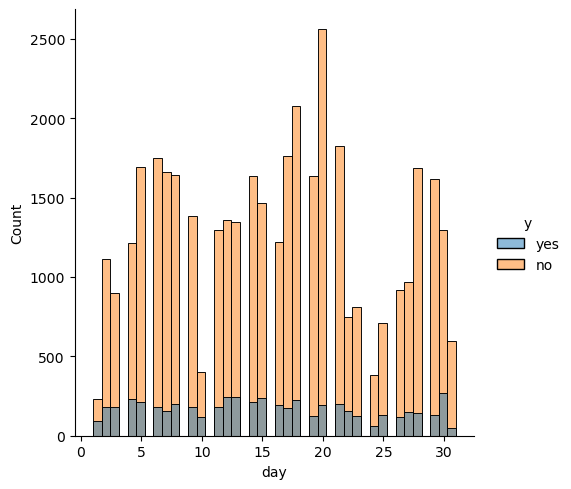

<Figure size 640x480 with 0 Axes>

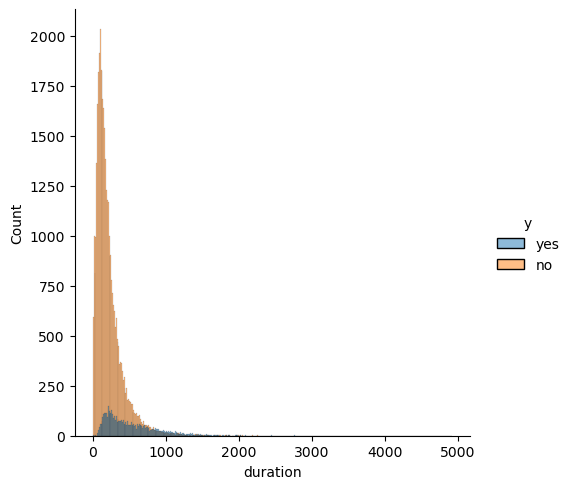

<Figure size 640x480 with 0 Axes>

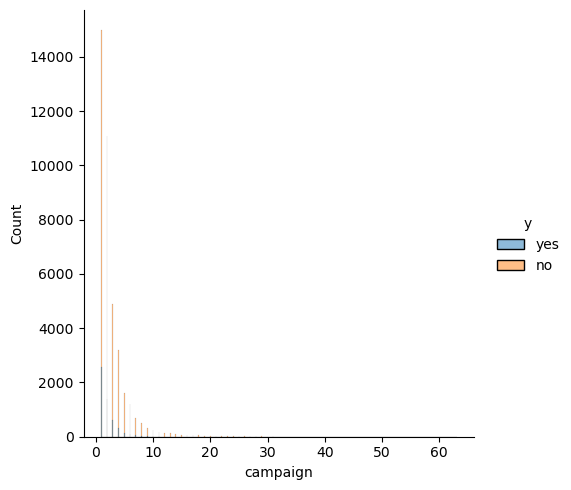

<Figure size 640x480 with 0 Axes>

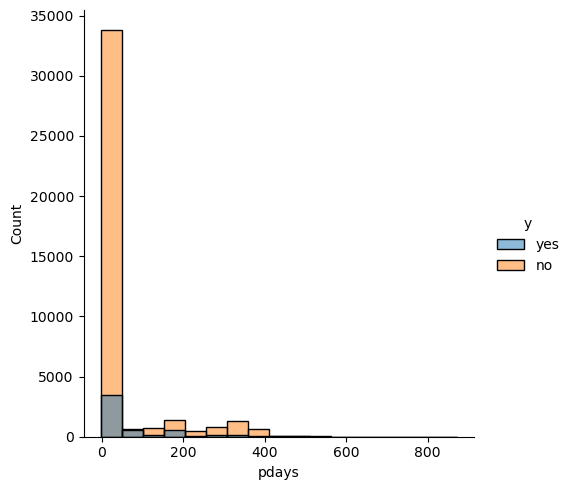

<Figure size 640x480 with 0 Axes>

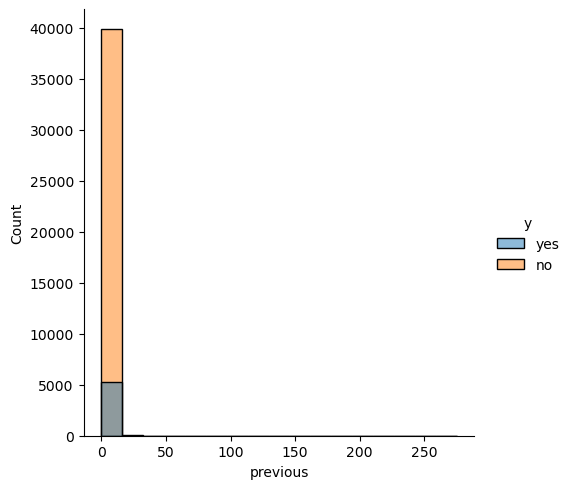

In [6]:
import matplotlib.pyplot as plt
#decomposons nos données en 02 groupes ceux qui on accepter l'offre et ceux qui l'on réfusé
for numeric in data.select_dtypes('int'):
    plt.figure()
    sns.displot(x=numeric, hue = 'y', data=data ,hue_order = ['yes', 'no'])
    #plt.legend()
    plt.xlabel(numeric)



### compte rendu
on remarque que les variables ages,pdays,days,previous,campaingn n'influencent pas ou très peu sur les prises de decision des clients car les courbes de distribution des clients ayant adheré a l'offre et ceux n'ayant pas adhéré semble être la même pour ces variables.
par contre les variables duration et balance semble plus infuencé car en effet on se rends compte que les clients qui ont accpeté l'offre on plus durée au téléphone avec les conseillers banquaires et aussi que le soldes annuel de ceux qui n'ont pas  accépté l'offre varie differement par rapport a ceux qui ont accepté l'offre

### données categorielle


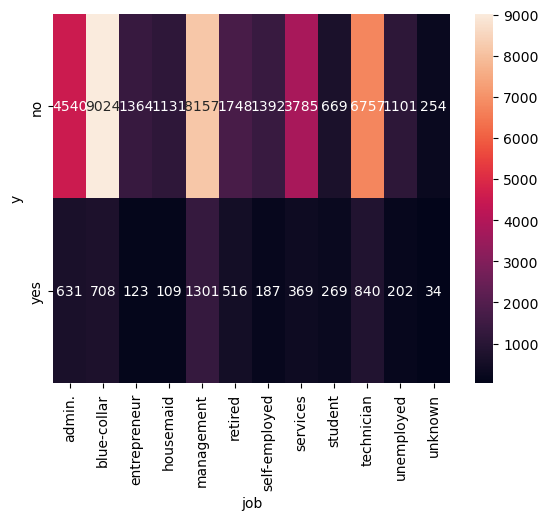

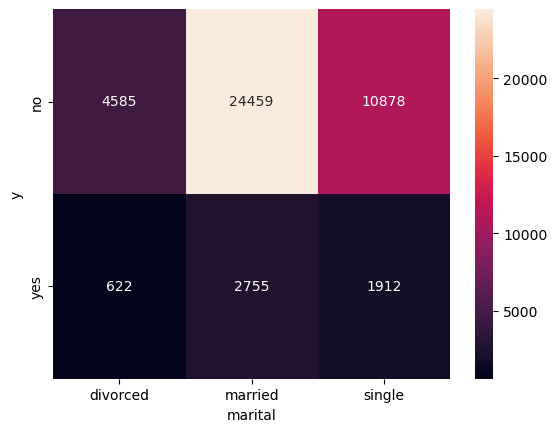

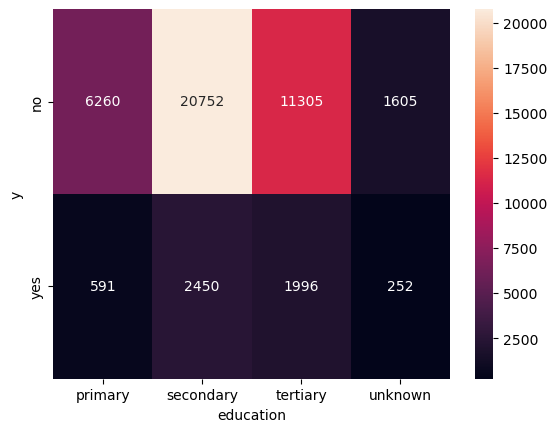

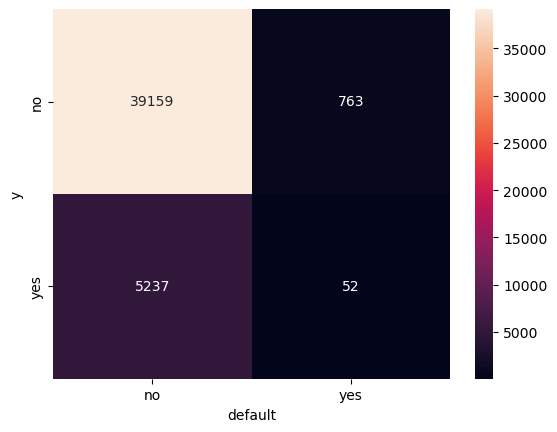

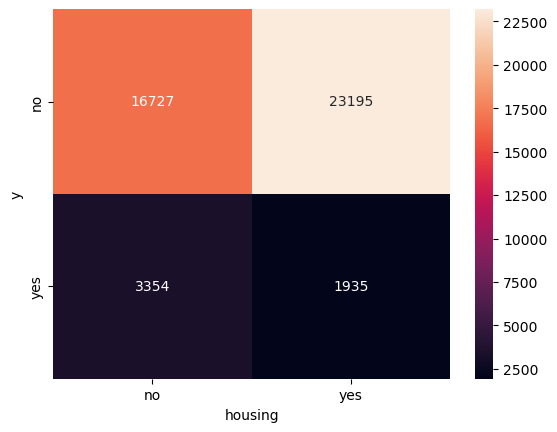

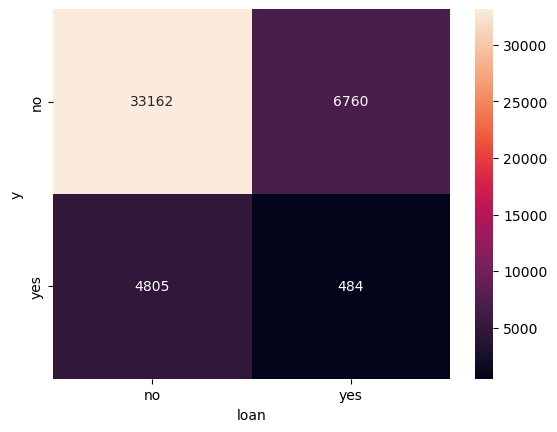

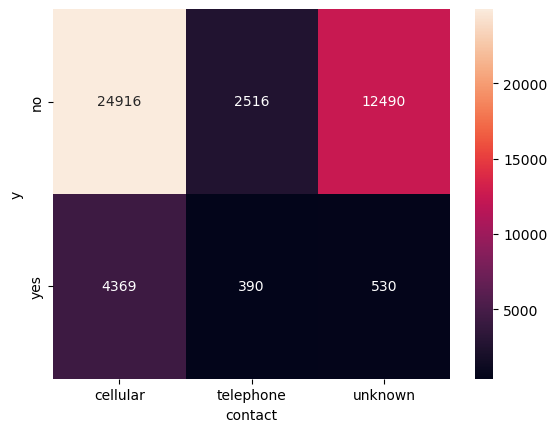

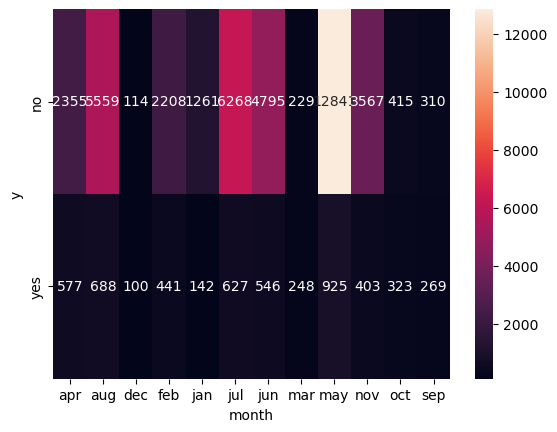

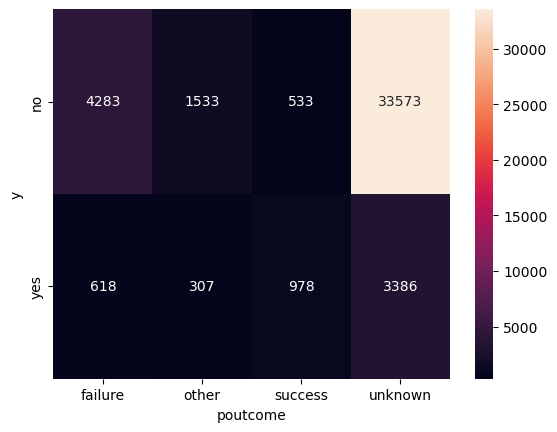

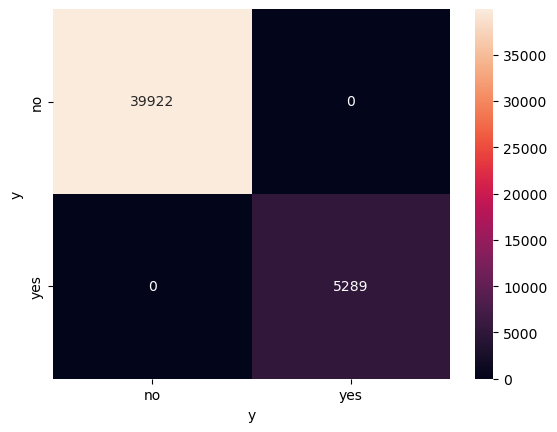

In [7]:
for catego in data.select_dtypes('object'):
    plt.figure()
    sns.heatmap(pd.crosstab(data['y'],data[catego]),annot=True,fmt='d')

### compte rendu
on se rend compte que toutes les autres variables catégorielle (contact,month,poutcome...)influences sur le choix des potentiel clients de la banque.on va vérifier tous ces hypothèses lors de l'entrainement du modèle

### Etape de preprocessing

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train_data,test_data=train_test_split(data,test_size=0.2,random_state=20)
print(train_data.shape)
print(test_data.shape)

(36168, 17)
(9043, 17)


### Encodage et normalisation 

In [12]:
#import des librairies
from sklearn.preprocessing import RobustScaler,OrdinalEncoder
from sklearn.compose import make_column_selector,make_column_transformer
from sklearn.pipeline import make_pipeline

In [13]:
#selection des colonnes selon leurs types de données
import numpy as np
numerical_features=make_column_selector(dtype_include=np.number)
categorical_features=make_column_selector(dtype_include=object)

In [14]:
#creation des chaines de transformation
numerical_pipeline=RobustScaler()
categorical_pipeline=OrdinalEncoder()

In [15]:
pipeline=make_column_transformer((numerical_pipeline,numerical_features),(categorical_pipeline,categorical_features))


In [16]:
#création des ensembles d'entrainement et de test
y_train=train_data.pop('y')
x_train=train_data
y_test=test_data.pop('y')
x_test=test_data

In [17]:
#regardons la proportion de chaque classe dans notre dataset
print(x_train.shape[0])
print(np.sum(y_train=='yes'),np.sum(y_train=='no'))

36168
4242 31926


### on remarque que on se trouve dans une classification désiquilibré car il y'a beaucoup plus de non(31926) que de oui (4242)
ce qui va nuire a l'entrainement de notre model pour palier à cela nous decidons d'effectuer 02 techniques :le sur-échantillonage de la classe  minoritaire ('yes') et sous-échantillonage de la classe majoritaire ('no') et enfin on va comparer ces 02 techniques pour voir qu'elle a la meilleur performance

In [18]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
# Sur-échantillonnage
ros = RandomOverSampler()
x_o, y_o = ros.fit_resample(x_train, y_train)
print(np.sum(y_o=='yes'),np.sum(y_o=='no'))
#sous-echantillonage
rus=RandomUnderSampler()
x_u, y_u = rus.fit_resample(x_train, y_train)
print(np.sum(y_u=='yes'),np.sum(y_u=='no'))

31926 31926
4242 4242


### Entrainement du model

In [19]:
#definissons le modèle
from sklearn.tree import DecisionTreeClassifier
model_o=make_pipeline(pipeline,DecisionTreeClassifier(random_state=1))
model_u=make_pipeline(pipeline,DecisionTreeClassifier(random_state=1))

In [20]:
model_o.fit(x_o,y_o)
model_u.fit(x_u,y_u)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('robustscaler',
                                                  RobustScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002D404EEB3A0>),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002D404C5EC40>)])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=1))])

### test du model 

In [21]:
#importons les metrics de succès
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer

model over_sample
[[7352  644]
 [ 602  445]]
              precision    recall  f1-score   support

          no       0.92      0.92      0.92      7996
         yes       0.41      0.43      0.42      1047

    accuracy                           0.86      9043
   macro avg       0.67      0.67      0.67      9043
weighted avg       0.86      0.86      0.86      9043

model under_sample
[[6325 1671]
 [ 249  798]]
              precision    recall  f1-score   support

          no       0.96      0.79      0.87      7996
         yes       0.32      0.76      0.45      1047

    accuracy                           0.79      9043
   macro avg       0.64      0.78      0.66      9043
weighted avg       0.89      0.79      0.82      9043



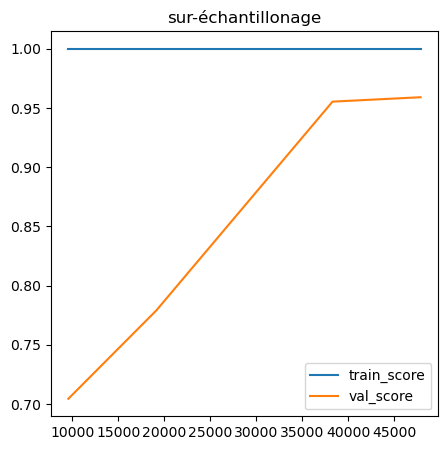

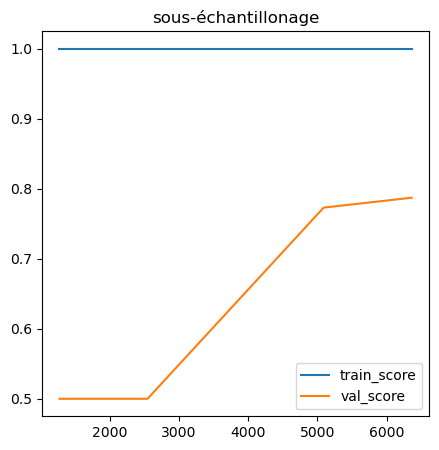

In [27]:
#effectuons nos prédiction
y_pred_u=model_u.predict(x_test)
y_pred_o=model_o.predict(x_test)
#affichons les scores pour la méthode de sur-échantillonage
print('model over_sample')
print(confusion_matrix(y_test,y_pred_o))
print(classification_report(y_test,y_pred_o))
#score pour la méthode de sous-échantillonage
print('model under_sample')
print(confusion_matrix(y_test,y_pred_u))
print(classification_report(y_test,y_pred_u))
#affichons la courbe d'entrainement avec la methode de cross validation
#courbe du model de sur-échantillonage
plt.figure(figsize=(5,5))
n,train_score,val_score=learning_curve(model_o,x_o,y_o,cv=4,scoring='accuracy',train_sizes=[0.2,0.4,0.8,1])
plt.plot(n,train_score.mean(axis=1),label='train_score')
plt.plot(n,val_score.mean(axis=1),label='val_score')
plt.title('sur-échantillonage')
plt.legend()
#courbe de sous-échantillonage
plt.figure(figsize=(5,5))
n,train_score,val_score=learning_curve(model_u,x_u,y_u,cv=4,scoring='accuracy',train_sizes=[0.2,0.4,0.8,1])
plt.plot(n,train_score.mean(axis=1),label='train_score')
plt.plot(n,val_score.mean(axis=1),label='val_score')
plt.title('sous-échantillonage')
plt.legend()
plt.show()


### on constate que le meillleur model est celui qui à été entrainé avec la technique de sur-echantillonage 
car on a une précision plus éléve avec se model sur les données test
et aussi notre model est performant car on atteint une précision de 86% sur les données test ce qui est bien

<AxesSubplot:>

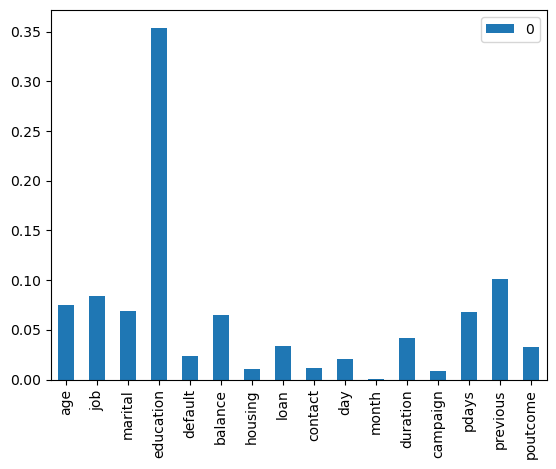

In [26]:
#regardons les variables dont le model se base le plus pour effectué ses predictions
dtc=model_o.named_steps['decisiontreeclassifier']
pd.DataFrame(dtc.feature_importances_,index=x_o.columns).plot(kind='bar')

### ainsi nos hypothèse de départ n'etaient pas totalement vrai car d'autre variable  que ceux cités plus haut sont prises en compte par notre model pour effectuer ses prédiction